# Deep Learning
## Exercise Sheet 04 - TensorFlow MLP XOR
### Prof. Dr. David Spieler
### david.spieler@hm.edu 
### University of Applied Sciences Munich

In [1]:
import tensorflow as tf
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# xor data
x_data = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
])

y_data = np.array([
    [0.0],
    [1.0],
    [1.0],
    [0.0]
])

In [3]:
# declare a placeholder x that can take an arbitrary number of 2-d input points
x = tf.placeholder(tf.float32, [None,2])

# declare a placeholder y that can take an arbitrary number of scalar output values
y = tf.placeholder(tf.float32, [None,1])

In [4]:
def construct_model(x, y):
    # declare a tensor variable W_input that represents the weights w11, w12, w21, w22 of the input layer
    # initialize the tensor with the values 0.4, 0.9, 0.2, -0.8
    W_input = tf.Variable([[0.,0.],[0.,0.]], name='W_input', dtype=tf.float32)
    
    # declare a tensor variable b_input that represents the bias weights w1, w2 of the input layer
    #b_start = tf.constant([[0.5,-0.5]])
    #b_input = tf.Variable(b_start, name='b_input', dtype=tf.float32)
    b_input = tf.Variable(tf.zeros([1,2], "float32"), name='b_input', dtype=tf.float32)
    
    # declare a tensor variable W_hidden that represents the weights w13, w23 of the hidden layer
    #W_start = tf.constant([[-0.5],[0.5]])
    #W_hidden = tf.Variable(W_start, name='w_hidden', dtype=tf.float32)
    W_hidden = tf.Variable(tf.zeros([2,1], "float32"), name='w_hidden', dtype=tf.float32)
    
    # declare a tensor variable b_hidden that represents the bias weight w3 of the hidden layer
    #B_start = tf.constant([[0.5]])
    #b_hidden = tf.Variable(B_start, name='b_hidden', dtype=tf.float32)
    b_hidden = tf.Variable(tf.zeros([1,1], "float32"), name='b_hidden', dtype=tf.float32)
    
    # construct the hidden layer via sigmoid(x * W_input + b_input)
    hidden = tf.nn.sigmoid(tf.add(tf.matmul(x, W_input),b_input))
    
    # construct the output layer via sigmoid(hidden * W_hidden + b_hidden)
    output = tf.nn.sigmoid(tf.add(tf.matmul(hidden,W_hidden),b_hidden))
    
    return output
output = construct_model(x, y)
output

<tf.Tensor 'Sigmoid_1:0' shape=(?, 1) dtype=float32>

In [5]:
# declare the cost function: mse (mean squared error)
mse = tf.reduce_mean(tf.squared_difference(output, y))

In [6]:
# declare the optimiser: minimize the mse using gradient descent with a learning rate of 0.5
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(mse)

In [7]:
# train the model
init_op = tf.global_variables_initializer()
costs = []
neural_net_output = []
with tf.Session() as session:
    session.run(init_op)
    for epoch in range(10000):
        _, c = session.run([optimiser, mse], feed_dict={x: x_data, y: y_data})
        
        costs.append(c)
        if epoch % 200 == 0:
            print("Epoch", (epoch + 1), ", cost =", "{:3f}".format(c)) 
    print("final cost=", "{:3f}".format(costs[-1]))
    neural_net_output = session.run(output, feed_dict={x: x_data, y: y_data})

Epoch 1 , cost = 0.250000
Epoch 201 , cost = 0.250000
Epoch 401 , cost = 0.250000
Epoch 601 , cost = 0.250000
Epoch 801 , cost = 0.250000
Epoch 1001 , cost = 0.250000
Epoch 1201 , cost = 0.250000
Epoch 1401 , cost = 0.250000
Epoch 1601 , cost = 0.250000
Epoch 1801 , cost = 0.250000
Epoch 2001 , cost = 0.250000
Epoch 2201 , cost = 0.250000
Epoch 2401 , cost = 0.250000
Epoch 2601 , cost = 0.250000
Epoch 2801 , cost = 0.250000
Epoch 3001 , cost = 0.250000
Epoch 3201 , cost = 0.250000
Epoch 3401 , cost = 0.250000
Epoch 3601 , cost = 0.250000
Epoch 3801 , cost = 0.250000
Epoch 4001 , cost = 0.250000
Epoch 4201 , cost = 0.250000
Epoch 4401 , cost = 0.250000
Epoch 4601 , cost = 0.250000
Epoch 4801 , cost = 0.250000
Epoch 5001 , cost = 0.250000
Epoch 5201 , cost = 0.250000
Epoch 5401 , cost = 0.250000
Epoch 5601 , cost = 0.250000
Epoch 5801 , cost = 0.250000
Epoch 6001 , cost = 0.250000
Epoch 6201 , cost = 0.250000
Epoch 6401 , cost = 0.250000
Epoch 6601 , cost = 0.250000
Epoch 6801 , cost = 0

In [8]:
print("neural network output:\n", neural_net_output)

neural network output:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]


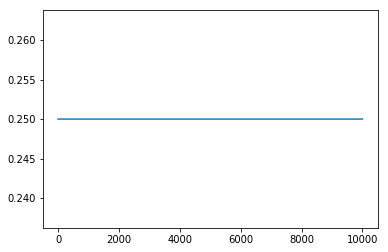

In [9]:
plt.plot(costs)

Durch den Start mit 0 als Gewichtung wird genau ein lokales Minimum getroffen. Dadurch kann der GradientDescent-Algorithmus keine bessere Lösung finden und die Lösung ändert sich nicht.